In [24]:
import pandas as pd
import re
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
df = pd.read_csv('training.csv', header=None, names=['sentiment', 'id', 'date', 'query', 'user', 'text'], encoding='ISO-8859-1')
df = df.drop(columns=['query', 'id', 'user', 'date'])

C:\Users\Radosz\AppData\Local\Temp\ipykernel_6148\1493389583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


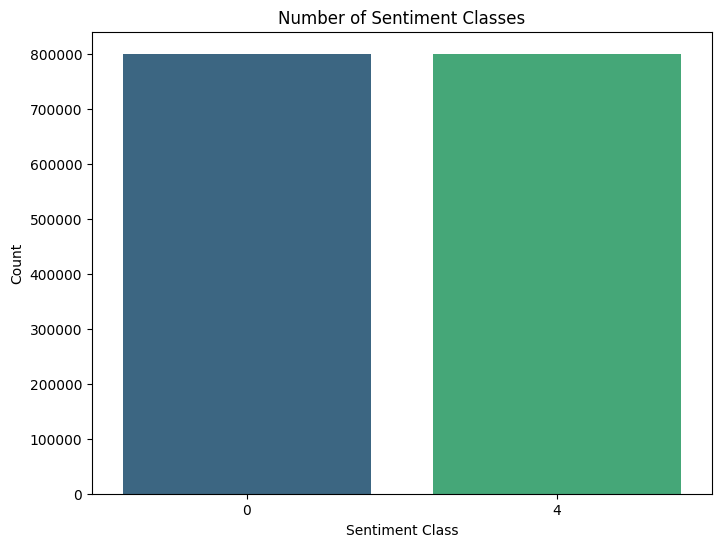

In [4]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Number of Sentiment Classes")
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.show()

In [5]:
def count_hashtags(text):
    return len(re.findall(r'#', text))

def clean_text(text):
    text = text.lower()  # Lowercase the text
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags and following text
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['hashtag_count'] = df['text'].apply(count_hashtags)

In [6]:
df[['text']] = df['text'].apply(lambda x: pd.Series(clean_text(x)))
df

,sentiment,text,hashtag_count
0,0,awww thats a bummer you shoulda got david carr...,0
1,0,is upset that he cant update his facebook by t...,0
2,0,i dived many times for the ball managed to sav...,0
3,0,my whole body feels itchy and like its on fire,0
4,0,no its not behaving at all im mad why am i her...,0
...,...,...,...
1599995,4,just woke up having no school is the best feel...,0
1599996,4,thewdbcom very cool to hear old walt interviews â,0
1599997,4,are you ready for your mojo makeover ask me fo...,0
1599998,4,happy 38th birthday to my boo of alll time tup...,0


In [16]:
num_words=10000
max_length = 20

tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

X_padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

y_binary = [1 if label == 4 else 0 for label in df['sentiment']]

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_padded, y_binary, test_size=0.2, random_state=42)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
y_train = np.array(y_train, dtype=np.int32)
y_val = np.array(y_val, dtype=np.int32)

embedding_dim = 128

# Budowa modelu LSTM
model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

results = model.evaluate(X_val, y_val)
print("Loss, Accuracy:", results)

model.save("models/lstm_sentiment_binary_model.h5")

Epoch 1/10


c:\Users\Radosz\Desktop\sem7\Sentiment_analysys\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40000/40000 ━━━━━━━━━━━━━━━━━━━━ 213s 5ms/step - accuracy: 0.7848 - loss: 0.4555 - val_accuracy: 0.8151 - val_loss: 0.4042
Epoch 2/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 216s 5ms/step - accuracy: 0.8227 - loss: 0.3925 - val_accuracy: 0.8186 - val_loss: 0.3976
Epoch 3/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 212s 5ms/step - accuracy: 0.8317 - loss: 0.3749 - val_accuracy: 0.8196 - val_loss: 0.3962
Epoch 4/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 220s 6ms/step - accuracy: 0.8394 - loss: 0.3616 - val_accuracy: 0.8202 - val_loss: 0.3974
Epoch 5/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 221s 6ms/step - accuracy: 0.8459 - loss: 0.3488 - val_accuracy: 0.8182 - val_loss: 0.4017
Epoch 6/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 216s 5ms/step - accuracy: 0.8522 - loss: 0.3371 - val_accuracy: 0.8178 - val_loss: 0.4040
Epoch 7/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 225s 6ms/step - accuracy: 0.8570 - loss: 0.3279 - val_accuracy: 0.8167 - val_loss: 0.4056
Epoch 8/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 218s 5ms/step - accuracy: 0.8

Loss, Accuracy: [0.4137176275253296, 0.8135374784469604]


In [25]:
# Budowa modelu CNN
model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5), 
    Dense(32, activation='relu'), 
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Trenowanie modelu
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

# Ewaluacja modelu
results = model.evaluate(X_val, y_val)
print("Loss, Accuracy:", results)

# Zapis modelu
model.save("models/cnn_sentiment_binary_model.h5")


Epoch 1/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 134s 3ms/step - accuracy: 0.7762 - loss: 0.4678 - val_accuracy: 0.8077 - val_loss: 0.4185
Epoch 2/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 129s 3ms/step - accuracy: 0.8094 - loss: 0.4159 - val_accuracy: 0.8115 - val_loss: 0.4115
Epoch 3/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 130s 3ms/step - accuracy: 0.8167 - loss: 0.4030 - val_accuracy: 0.8130 - val_loss: 0.4124
Epoch 4/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 130s 3ms/step - accuracy: 0.8218 - loss: 0.3938 - val_accuracy: 0.8130 - val_loss: 0.4117
Epoch 5/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 130s 3ms/step - accuracy: 0.8262 - loss: 0.3863 - val_accuracy: 0.8145 - val_loss: 0.4073
Epoch 6/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 130s 3ms/step - accuracy: 0.8281 - loss: 0.3818 - val_accuracy: 0.8143 - val_loss: 0.4096
Epoch 7/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 130s 3ms/step - accuracy: 0.8316 - loss: 0.3760 - val_accuracy: 0.8143 - val_loss: 0.4076
Epoch 8/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 130s 3ms/step - ac

Loss, Accuracy: [0.4080134332180023, 0.8140031099319458]


In [11]:
X_padded

array([[463, 102,   4, ...,   0,   0,   0],
       [  8, 776,  18, ..., 145,  42, 261],
       [  1, 309, 348, ...,   0,   0,   0],
       ...,
       [ 36,   7, 200, ...,   0,   0,   0],
       [118, 264,   2, ...,   0,   0,   0],
       [118,   0,   0, ...,   0,   0,   0]], dtype=int32)